# Multi-armed bandits

In this task you are going to implement ETC and UCB. Then you will play around the parameters in order to draw some more conclusion.

Outline:
* Simulator writing
* ETC and experiments
* UCB and experiments

## Bulding a simulator for the bandit

In [0]:
from matplotlib import pyplot as plt
import numpy as np  # we can use this library for working with matrices
from numpy.random import random_sample

In [0]:
class Bandit:
    def __init__(self, k, means, rounds):
        # we assume Gaussian distributions with sigma=1
        self.k = k  # number of arms
        self.means = means
        self.rounds = rounds  # number of available rounds
        
        # ----- chose the optimal reward -----
        self.optimal_reward = max(self.means)
        self.counter = 0
        # gather the empirical regret so far
        self.empirical_regret = 0
        self.emp_regrets = []
        # gather the expected regret so far
        self.expected_regret = 0
        self.exp_regrets = []
    
    def play_arm(self, arm):
        # ----- sample the appropriate reward -----
        mu=self.means[arm]
        reward=np.random.normal(mu)
        self.empirical_regret+=self.optimal_reward-reward
        self.expected_regret += self.optimal_reward-mu
        self.counter +=1
        self.emp_regrets.append(self.empirical_regret)
        self.exp_regrets.append(self.expected_regret)
        # ----- calculate the regret so far and save it -----
        
        
        return reward
    
    def finished(self):
        # ----- return if there is no more round remained -----
        return self.counter >= self.rounds
    
    def plot_regret(self):
        plt.plot(list(range(self.counter)), self.emp_regrets, 'b+', list(range(self.counter)), self.exp_regrets, 'ro')
        plt.xlabel("iteration")
        plt.ylabel("regret")
        plt.show()

## ETC algorithm

In [0]:
class ETCsolver:
    def __init__(self, k, m, bandit):
        self.k = k  # number of arms
        self.m = m  # number of exploration rounds for each arm
        self.bandit = bandit
        
        # ----- create a cache storing the number of trials and the average rewards -----
        # for each action
        self.cache = np.zeros((k, 2))
    
    def _exploration_phase(self):
        counter = 0
        while counter < self.k * self.m:
            arm=counter % self.k
            reward=self.bandit.play_arm(arm)
            self.cache[arm,0]+=1
            self.cache[arm,1]+=reward
            counter +=1
            # ----- implement the exploration part -----
            # play the bandit and update cache
    
    def _choose_best_action(self):
        # ----- we calculate the average reward of each arm -----
        scores=self.cache[:,1]/self.cache[:,0]
        # return the best arm
        return np.argmax(scores)
        
        return 
    
    def run(self):
        self._exploration_phase()
        # after exploration we choose the best action
        optimal_arm = self._choose_best_action()
        # ----- play until finished -----
        while not self.bandit.finished():
            self.bandit.play_arm(optimal_arm)
    
    def get_regret(self):
        return self.bandit.regrets
    
    def best_action(self):
        return self._choose_best_action() + 1

In [0]:
def experiment_etc(k, mu, m, rounds):
    bandit = Bandit(k, mu, rounds)
    etc = ETCsolver(k, m, bandit)

    etc.run()
    etc.bandit.plot_regret()
    print("Optimal action: {}".format(etc.best_action()))

## UCB algorithm

In [0]:
class UCBsolver:
    def __init__(self, k, delta, bandit):
        self.k = k  # number of actions
        self.delta = delta  # error probability
        self.bandit = bandit

        self.cache = np.zeros((k, 2))  # stores the number and rewards so far
        self.actions = []
    
    def _init_phase(self):
        # at the very beginning each arm is equally good
        # unexplored arms are always the best
        # ----- pick each arm once to initialize the cache -----
        # we want to avoid division by zero
        # TODO
        for arm in range(self.k):
            reward = self.bandit.play_arm(arm)
            self.cache[arm, 0] = self.cache[arm, 1] + 1
            self.cache[arm, 1] = (self.cache[arm, 0] * self.cache[arm, 1] + reward) / (self.cache[arm, 0] + 1)
            
    
    def _choose_best_action(self):
        # this implements the score for ucb
        list_of_scores = []
        # ----- first is the average reward term -----
        for arm in range(self.k):
        # ----- second is the exploration term -----
          average_reward = sum(self.cache[arm]) + (self.bandit.counter-1)
          # ----- second is the exploration term -----
          exploration_term = ((2 * np.log(1/self.delta))/ np.sqrt((self.k * (self.bandit.counter - 1))))
          list_of_scores.append(average_reward + exploration_term)

        for index, score in enumerate(list_of_scores):
            if index == 0:
                highest_score = score
                highest_index = index
            else: 
                if highest_score < score:
                    highest_score = score
                    highest_index = index

        return highest_index
    
    def run(self):
        self._init_phase()
        while not self.bandit.finished():
          # ----- choose optimal arm -----
          optimal_arm = self._choose_best_action()
          # ----- storing the actions so far -----
          self.actions.append(optimal_arm)
          # ----- playing the chosen arm -----
          reward_optimal = self.bandit.play_arm(optimal_arm)
          # ----- update cache -----
          self.cache[optimal_arm,1] = ((self.cache[optimal_arm,1] + reward_optimal * self.cache[optimal_arm,0])/(self.cache[optimal_arm,0]+1))
          self.cache[optimal_arm,0] =  self.cache[optimal_arm,1] + 1
          
    
    def plot_actions(self):
        plt.plot(list(range(len(self.actions))), self.actions, 'r+')
        plt.xlabel("iteration")
        plt.ylabel("chosen action")
        plt.show()

In [0]:
def experiment_ucb(k, mu, delta, rounds):
    bandit = Bandit(k, mu, rounds)
    ucb = UCBsolver(k, delta, bandit)

    ucb.run()
    ucb.bandit.plot_regret()
    ucb.plot_actions()

## Experiments

### ETC use-cases

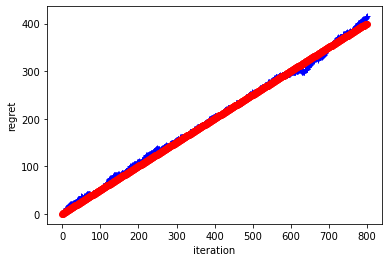

Optimal action: 2


In [7]:
# Try it with two arms and small difference between the mean values
# What are the required number of rounds to find the best action?

etc_case1 = experiment_etc(
                  k = 2,
                  mu=(1,2),
                  m= 400,
                  rounds=500
                  )

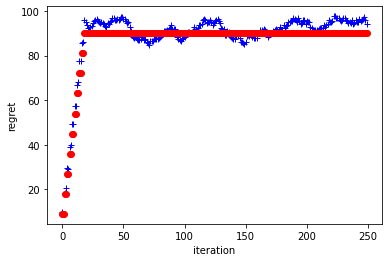

Optimal action: 2


In [8]:
# Try it with two arms and big difference between the mean values
# What are the required number of rounds to find the best action?
etc_case2 = experiment_etc(
                  k = 2,
                  mu=(1,10),
                  m= 10,
                  rounds=250
                  )

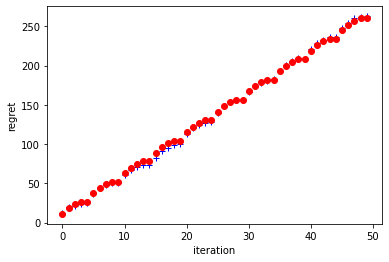

Optimal action: 5


In [9]:
# Try it with five arms and small differences among the mean values
# What are the required number of rounds to find the best action?

etc_case3 = experiment_etc(
                  k = 5,
                  mu=(1,5,7,9,12),
                  m= 10,
                  rounds=2
                  )

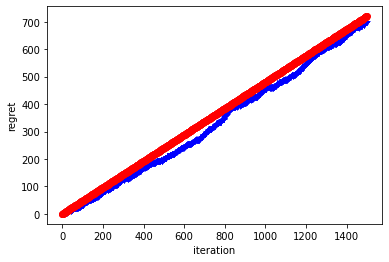

Optimal action: 10


In [10]:
# Try it with fifty arms and small differences among the mean values
# What are the required number of rounds to find the best action?
etc_case4 = experiment_etc(
                  k = 50,
                  mu=random_sample((50, )),
                  m= 30,
                  rounds=900
                  )


### UCB use-cases

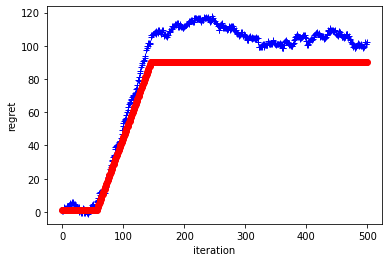

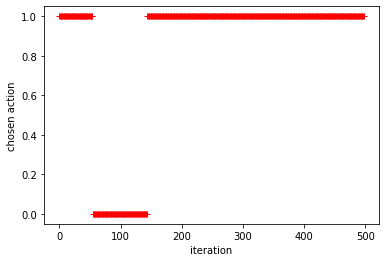

In [35]:
# Try it with two arms and small difference between the mean values
# What are the required number of rounds to find the best action?
# How the result changes with delta? 
ucb_case1 = experiment_ucb(
                            k=2, 
                            mu=(1,2), 
                            delta=0.5, 
                            rounds=500
                        )


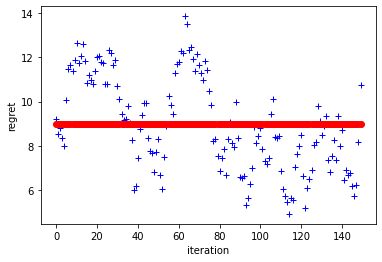

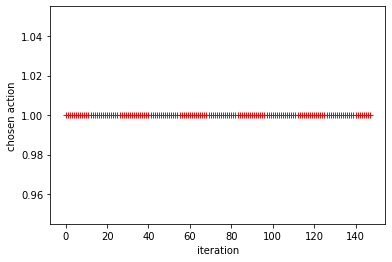

In [36]:
# Try it with two arms and big difference between the mean values
# What are the required number of rounds to find the best action?
# How the result changes with delta? 

ucb_case2 = experiment_ucb(
                            k=2, 
                            mu=(1,10), 
                            delta=0.67, 
                            rounds=150
                        )


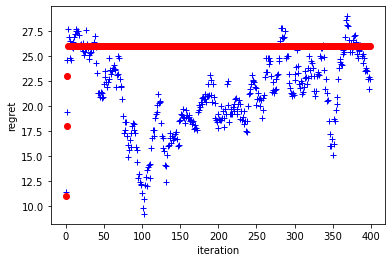

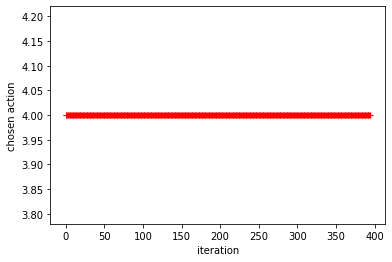

In [41]:
# Try it with five arms and small differences among the mean values
# What are the required number of rounds to find the best action?
# How the result changes with delta? 
ucb_case3 = experiment_ucb(
                            k=5, 
                            mu=(1,5,7,9,12), 
                            delta=0.59, 
                            rounds=400
                        )



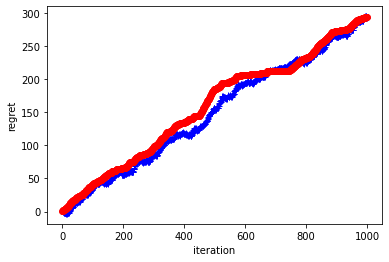

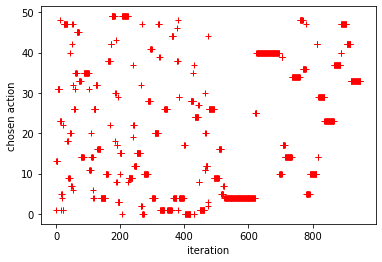

In [38]:
# Try it with fifty arms and small differences among the mean values
# What are the required number of rounds to find the best action?
# How the result changes with delta?

ucb_case4 = experiment_ucb(
                            k=50, 
                            mu=random_sample((50, )), 
                            delta=0.79, 
                            rounds=1000
                        )
